<h1 align="center">Machine Learning para o problema do Titanic<h1>

<figure>
    <center>
        <img src="https://github.com/fthara/titanicKaggle/blob/master/titanicImage.jpeg?raw=true" style="height:250px; width:500px" alt="Titanic">
        <figcaption>Naufrágio do Titanic</figcaption>
    </center>
</figure>

<p><font size="3.5"><b>Obejtivo:</b> Criar um modelo preditivo que descubra quem morreu e quem sobreviveu durante o naufrágio do Titanic</font><p>

<p><font size="3.5">Para começar a construir nosso modelo preditivo precisamos importat algumas bibliotecas do python que serão necessárias.</font><p>

In [1]:
#Bibliotecas para ler o dataframe e manipular os dados.
import pandas as pd
import numpy as np

#Bibliotecas para construir gráficos em Python.
import matplotlib.pyplot as plt
import seaborn as sns

#Biblitecas para construir o modelo preditivo.
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
#from sklearn.model_selection import cross_val_score
#from sklearn.impute import SimpleImputer
#from sklearn.model_selection import train_test_split
#from sklearn.model_selection import RandomizedSearchCV
#from scipy.stats import uniform

<p><font size="3.5">Agora vamos ler os dados de treino com a biblioteca do Pandas.</font><p>

In [2]:
#Lendo os dados de treino do Titanic
dfTrain = pd.read_csv('https://raw.githubusercontent.com/fthara/titanicKaggle/master/dataSets/train.csv')
#Exibindo as 5 primeiras linhas do dataframe.
dfTrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<p><font size="3.5">Este é o nosso data frame. O significado em algumas colunas são bem óbvios, mas em outras nem tanto, portanto vou colocar a tabela do kagle com o significado de cada coluna do nosso dataframe</font><p>

<font size="5">
<table border="1" width="100%">
    <thead>
        <tr>
            <td><b>Variável</b></td>
            <td><b>Definição</b></td>
            <td><b>Valor</b></td>
        </tr>
    </thead>
    <tbody>
        <tr>           
            <td>Survival</td>
            <td>Sobreviventes</td>
            <td>0 = No, 1 = Yes</td>           
        </tr>
        <tr>
            <td>Pclass</td>
            <td>Classe do Passageiro</td>
            <td>1 = 1ª Classe, 2 = 2ª Classe, 3 = 3ª Classe</td>
        </tr>
        <tr>
            <td>sex</td>
            <td>Sexo</td>
            <td></td>
        </tr>
        <tr>
            <td>Age</td>
            <td>Idade em anos</td>
            <td></td>
        </tr>
        <tr>
            <td>SibSp</td>
            <td>Quantidade de Irmãos / Conjuge a bordo</td>
            <td></td>
        </tr>
        <tr>
            <td>Parch</td>
            <td>Quantidade de Pais / irmãos a bordo</td>
            <td></td>
        </tr>
        <tr>
            <td>Ticket</td>
            <td>Código de Ticket</td>
            <td></td>
        </tr>
        <tr>
            <td>Fare</td>
            <td>Taxa de Embarque</td>
            <td></td>
        </tr>
        <tr>
            <td>Cabin</td>
            <td>Número da Cabine</td>
            <td></td>
        </tr>
        <tr>
            <td>Embarked</td>
            <td>Porto de Embarque</td>
            <td>C = Cherbourg, Q = Queenstown, S = Southampton</td>
        </tr>
    </tbody>
</table>
</font>

<p><font size="3.5">Agora que sabemos o significado de cada coluna podemos começar nossa análise.</font><p>

In [3]:
#descobrindo o tamanho do daframe
dfTrain.shape

(891, 12)

In [4]:
#Vamos fazer o describe para visualizar dados estatísticos básicos relacionados as colunas do dataframe.
dfTrain.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<p><font size="3.5">No describe podemos ver alguns dados estatísticos relacionados às colunas do dataframe, lembrando que ele só funciona para variáveis numéricas. Aparentemente não consigo ver nenhum dado relevante através do decribe por enquanto.</font><p>

<p><font size="3.5">Quem lembra do filme do Titanic sabe que a prioridade para se salvar era de mulheres e crianças. Portanto já sabemos que as colunas "Sex" e "Age" serão importantes ao nosso dataframe, resta saber quais colunas também influenciarão em nosso modelo.</font><p>

<p><font size="3.5">Primeira coisa que gosto de fazer é verificar se existem valores nulos ou vazios no dataframe.</font><p>

In [5]:
dfTrain.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<p><font size="3.5">Podemos ver que existem valores vazios em "Age", "Cabin" e "Embarked", como eu ja disse anteriormente, a coluna "Age" é de extrema importancia à nossa modelagem, já as colunas Cabin e Embarked ainda analizaremos sua importância. Para tratar esses valores nulos da coluna "Age" vou tomar como estratégia dar a média de idade a cada variável "Age" nula de acordo com do título dado a cada um deles.</font><p>
<p><font size="3.5">Para isso vou criar uma nova coluna chamada "Title", que terá o título de cada passageiro dado no nome deles.</font><p>

In [6]:
#Separando o primero nome do ultimo nome.
new = dfTrain["Name"].str.split(",", n = 1, expand = True)
#Adicionando a coluna LastName ao dataframe, que conterá o Título e o resto do nome.
dfTrain["LastName"]= new[1] 
dfTrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr. Owen Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss. Laina
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr. William Henry


In [7]:
#Fazendo o mesmo processo para separar os nomes pelo Título.
#Separando o título do resto do nome.
new = dfTrain["LastName"].str.split(".", n = 1, expand = True) 
#Adicionando a coluna Title com o título.
dfTrain["Title"]= new[0]
dfTrain.drop(columns="LastName", inplace=True)
dfTrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


<p><font size="3.5">Devemos tomar um pouco de cuidado nessa divisão, pois a função split feita na primeira parte dividiu o nome logo após a vírgula, portanto o título dos nomes está com um espaço na frente deles. Vamos tirar esses espaço para não termos problemas futuramente.</font><p>

In [8]:
#A função strip() remove os espaços no começo e no fim de uma string.
dfTrain['Title']=dfTrain['Title'].str.strip()

In [9]:
#Verificando quantos títulos tem por idade nula.
dfTrain.loc[dfTrain['Age'].isnull()==True].Title.value_counts()

Mr        119
Miss       36
Mrs        17
Master      4
Dr          1
Name: Title, dtype: int64

In [10]:
#Calculando a média de idade por título e transformando em um dicionário.
mediaIdade = dfTrain.loc[dfTrain['Age'].isnull()==False]
mediaIdade = mediaIdade.groupby('Title')['Age'].mean().round()
mediaIdade = dict(mediaIdade)
print(mediaIdade)

{'Capt': 70.0, 'Col': 58.0, 'Don': 40.0, 'Dr': 42.0, 'Jonkheer': 38.0, 'Lady': 48.0, 'Major': 48.0, 'Master': 5.0, 'Miss': 22.0, 'Mlle': 24.0, 'Mme': 24.0, 'Mr': 32.0, 'Mrs': 36.0, 'Ms': 28.0, 'Rev': 43.0, 'Sir': 49.0, 'the Countess': 33.0}


In [11]:
#Aplicando a função map nos valores nulos para substituir os valores.
dfTrain.loc[dfTrain['Age'].isna()==True, 'Age'] = dfTrain.loc[dfTrain['Age'].isna()==True,'Title'].map(mediaIdade)
dfTrain.Age.isna().value_counts()

False    891
Name: Age, dtype: int64

<p><font size="3.5">Agora que as idades nulas de cada passageiro foi preenchida, podemos fazer as análises gráficas deste dataframe.</font><p>
<p><font size="3.5">Vamos começar explorando a idade dos passageiros. Podemos fazer um gráfico que a faixa etária deles e quantos sobreviveram ou morreram por faixa etária. Para isso precisamos criar uma nova coluna em nosso dataframe chamada "AgeRange", que nos trará a faixa etária deles.</font><p>

In [12]:
#Criando  coluna AgeRange.

bins = [0, 9.99, 19.99, 29.99, 39.99, 49.99, 59.99, 999]
faixaEtaria = ['Menos de 10','10 a 20','20 a 30', '30 a 40', '40 a 50', '50 a 60', 'Mais de 60']
dfTrain['AgeRange'] = pd.cut(dfTrain['Age'], bins, labels=faixaEtaria)
dfTrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeRange
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,20 a 30
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,30 a 40
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,20 a 30
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,30 a 40
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,30 a 40


## Explorando a Relação entre Sobreviventes e Mortos e suas Idades.

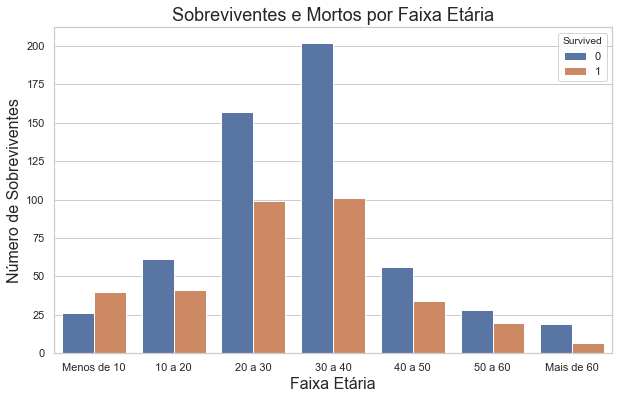

In [13]:
#Gerando o gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))

ax = sns.countplot(x=dfTrain.AgeRange, hue=dfTrain.Survived, data=dfTrain)
ax.xaxis.set_label_text("Faixa Etária",fontdict= {'size':16})
ax.yaxis.set_label_text("Número de Sobreviventes", fontdict={'size':16})
ax.set_title("Sobreviventes e Mortos por Faixa Etária", fontdict={'size':18})
plt.show()

<p><font size="3.5">Podemos ver neste gráfico que quem tem menos de 10 anos teve uma chance maior de sobrevivencia. Já nas outras faixas etárias, apesar da chance de sobreviver ser menor, essa diferença não é tão grande quanto eu esperava ser. Acredito que o sexo deve influenciar de forma mais forte esse modelo.</font><p>
<p><font size="3.5">Para tentar entender melhor, vamos quebrar esse gráfico por faixa etária, contando pelo sexo de cada pessageiro.</font><p>

## Explorando a Relação de Sobreviventes e Mortos por Faixa Etária e Sexo.

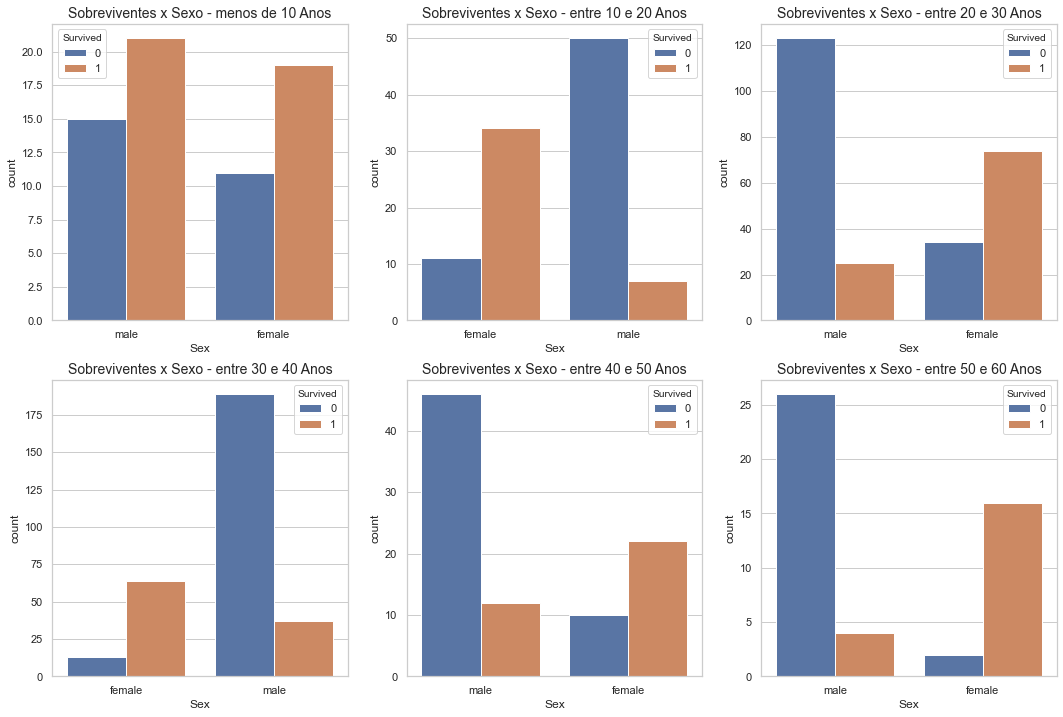

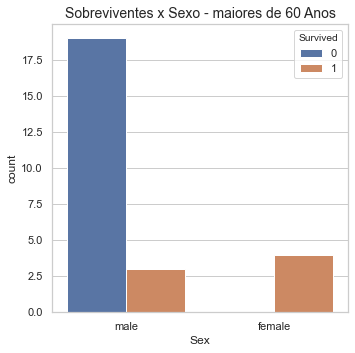

In [14]:
#Graficos de sobreviventes pelo sexo separados por idade.

#Criando dataframes de separados por idade.
menosDe10Anos = dfTrain.loc[dfTrain['Age']<10.0]
entre10e20Anos = dfTrain.query('Age>=10.0 and Age<20.0')
entre20e30Anos = dfTrain.query('Age>=20.0 and Age<30.0')
entre30e40Anos = dfTrain.query('Age>=30.0 and Age<40.0')
entre40e50Anos = dfTrain.query('Age>=40.0 and Age<50.0')
entre50e60Anos = dfTrain.query('Age>=50.0 and Age<60.0')
maisDe60Anos = dfTrain.loc[dfTrain['Age']>=60.0]

#Gerando os gráficos
fig, ax = plt.subplots(2,3,figsize=(18,12))
sns.countplot(x=menosDe10Anos.Sex, hue=menosDe10Anos.Survived, data=menosDe10Anos, ax=ax[0][0])
ax[0, 0].set_title('Sobreviventes x Sexo - menos de 10 Anos', fontsize=14)
sns.countplot(x=entre10e20Anos.Sex, hue=entre10e20Anos.Survived, data=entre10e20Anos, ax=ax[0][1])
ax[0, 1].set_title('Sobreviventes x Sexo - entre 10 e 20 Anos', fontsize=14)
sns.countplot(x=entre20e30Anos.Sex, hue=entre20e30Anos.Survived, data=entre20e30Anos, ax=ax[0][2])
ax[0, 2].set_title('Sobreviventes x Sexo - entre 20 e 30 Anos', fontsize=14)
sns.countplot(x=entre30e40Anos.Sex, hue=entre30e40Anos.Survived, data=entre30e40Anos, ax=ax[1][0])
ax[1, 0].set_title('Sobreviventes x Sexo - entre 30 e 40 Anos', fontsize=14)
sns.countplot(x=entre40e50Anos.Sex, hue=entre40e50Anos.Survived, data=entre40e50Anos, ax=ax[1][1])
ax[1, 1].set_title('Sobreviventes x Sexo - entre 40 e 50 Anos', fontsize=14)
sns.countplot(x=entre50e60Anos.Sex, hue=entre50e60Anos.Survived, data=entre50e60Anos, ax=ax[1][2])
ax[1, 2].set_title('Sobreviventes x Sexo - entre 50 e 60 Anos', fontsize=14)
plt.show()
plt.figure(figsize=(5.3,5.3))
ax=sns.countplot(x=maisDe60Anos.Sex, hue=maisDe60Anos.Survived, data=maisDe60Anos)
ax.set_title('Sobreviventes x Sexo - maiores de 60 Anos', fontsize=14)
plt.show()

<p><font size="3.5">Agora sim podemos ter uma visão mais clara desses dados. Quem é mulher tem chance de sobrevivencia maior em qualquer faixa etária, não importando a idade, agora quem é homem, só tem mais chance de sobrevivencia quando tem menos de 10 anos, já nas outras faixas etárias, as chances são bem menores.</font><p>
<p><font size="3.5">Portanto, com toda certeza o sexo é um fator importantissimo em nossa predição, como ja desconfiávamos antes, a idade também será um fator importante. Agora resta descobrir quais outros fatores vão influenciar em nosso modelo preidtivo.</font><p>
<p><font size="3.5">Uma coluna que pode ser interessante é a "Pclass", pois, como sabemos do filme, as pessoas com menor poder aquisitivo, que acredito se encontrarem na 3ª classe ficaram presas no porão do navio, enquanto as com maior poder aquisitivo estavam desembarcando.</font><p>

## Explorando a Relação de Sobreviventes e Mortos pela Classe.

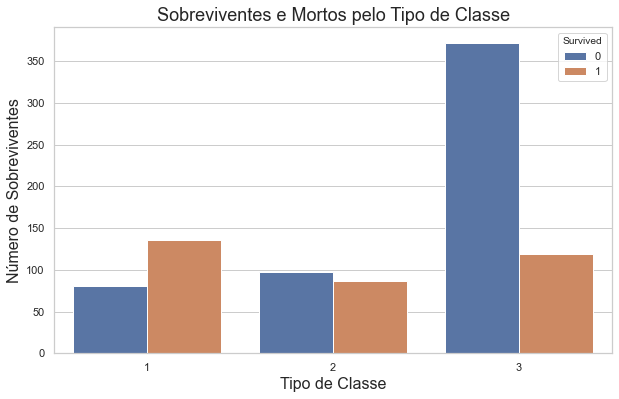

In [15]:
#Construindo o gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
ax = sns.countplot(x=dfTrain.Pclass, hue=dfTrain.Survived, data=dfTrain)
ax.xaxis.set_label_text("Tipo de Classe",fontdict= {'size':16})
ax.yaxis.set_label_text("Número de Sobreviventes", fontdict={'size':16})
ax.set_title("Sobreviventes e Mortos pelo Tipo de Classe", fontdict={'size':18})
plt.show()

<p><font size="3.5">Como eu ja desconfiava, quem era da terceira classe teve poucas chances de sobrevivencia, já na segunda classe as chances são quase de 50% e n primeira a chance de sobrivencia é maior.</font><p>
<p><font size="3.5">Agora que sabemos que o valor aquisitivo dos passageiros irá influenciar em nosso modelo preditvo podemos explorar também a taxa (Fare) paga por cada passageiro e ver se ela também nos tráz algum dado relevante.</font><p>

## Explorando a Relação de Sobreviventes e Morotos pela Taxa (Fare) e a Idade.

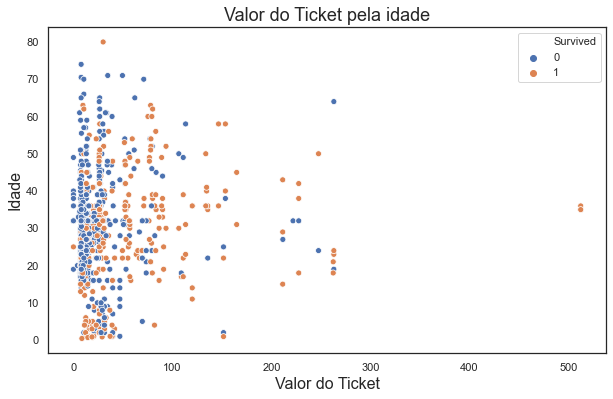

In [16]:
sns.set(style="white")
plt.figure(figsize=(10,6))

ax = sns.scatterplot(x=dfTrain.Fare, y=dfTrain.Age, hue=dfTrain.Survived, data=dfTrain)
ax.xaxis.set_label_text("Valor do Ticket",fontdict= {'size':16})
ax.yaxis.set_label_text("Idade", fontdict={'size':16})
ax.set_title("Valor do Ticket pela idade", fontdict={'size':18})
plt.show()

<p><font size="3.5">Como esses valores estão mal distribuídos (com dois valores muito altos) fica difícil analizar algo neste gráfico, vamos dividí-lo em duas parte, na primeira ficará quem pagou menos de 85 libras e na segunda quem pagou mais.</font><p>

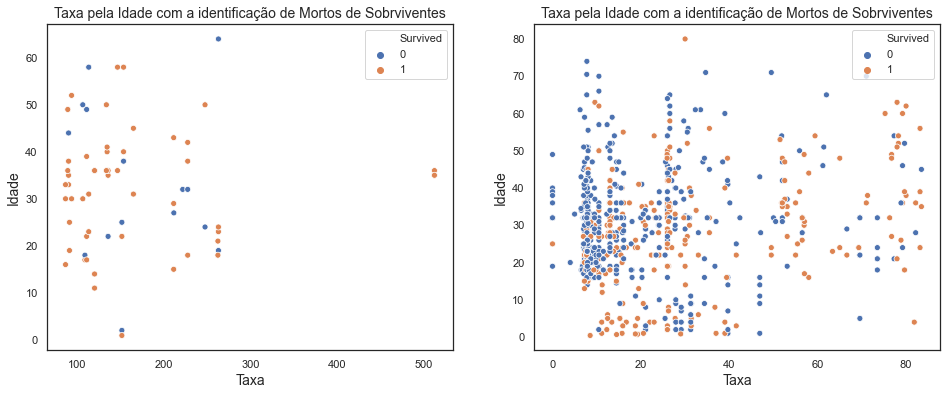

In [17]:
#Criando os datasets
maisDe85 = dfTrain.query('Fare > 85')
menosDe85 = dfTrain.query('Fare <=85')

fig, ax = plt.subplots(1,2,figsize=(16,6))
sns.scatterplot(x=maisDe85.Fare, y=maisDe85.Age, hue=maisDe85.Survived, data=maisDe85, ax=ax[0])
ax[0].set_title('Taxa pela Idade com a identificação de Mortos de Sobrviventes', fontsize=14)
ax[0].xaxis.set_label_text("Taxa", fontsize=14)
ax[0].yaxis.set_label_text("Idade", fontsize=14)
sns.scatterplot(x=menosDe85.Fare, y=menosDe85.Age, hue=menosDe85.Survived, data=menosDe85, ax=ax[1])
ax[1].set_title('Taxa pela Idade com a identificação de Mortos de Sobrviventes', fontsize=14)
ax[1].xaxis.set_label_text("Taxa", fontsize=14)
ax[1].yaxis.set_label_text("Idade", fontsize=14)
plt.show()

<p><font size="3.5">Agora podemos ter uma visão mais clara desses gráficos. Quem pagou mais caro, acima de 85 libras teve altas chances de sobrevivência, quem pagou entre 45 e 85 libras também teve boas chances de sobrevivência e esse percentual vai diminuindo a medida que o valor do ticket abaixa. Quem pagou menos de 17 libras por exemplo teve pouquissimas chances de sobrevivência.</font><p>
<p><font size="3.5">Portanto podemos criar uma coluna FareRange que vai nos dar grupos de taxas pagas pelos passageiro, assim acredito que o modelo conseguirá fazer uma previsão melhor.</font><p>

In [18]:
bins = [-1, 16.999, 44.999, 85.999, 999]
valorTicket = ['Menos de 17','17 a 45','45 a 85','Mais de 85']
dfTrain['FareRange'] = pd.cut(dfTrain['Fare'], bins, labels=valorTicket)
dfTrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeRange,FareRange
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,20 a 30,Menos de 17
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,30 a 40,45 a 85
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,20 a 30,Menos de 17
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,30 a 40,45 a 85
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,30 a 40,Menos de 17


<p><font size="3.5">Potanto para nossa primeira previsão vamos considerar as colunas "Plcas", "Sex", "AgeRage" e "FareRange". Vamos aos algoritmos!!</font><p>

# Algorítmos para o 1º Modelo Preditivo

<p><font size="3.5">Antes de começar a gerar os algoritmo vamos criar o X e y de treino com as colunas do dataframe que usaremos em nossos modelos.</font><p>

In [19]:
#Criação de X_teste1 y_teste1
X_train1 = dfTrain.loc[:, ["Pclass", "Sex", "AgeRange", "FareRange"]]
y_train1 = dfTrain["Survived"]

In [20]:
#Criando um "padrão" para a geração de números aleatórios.
np.random.seed(0)

<p><font size="3.5">Como as colunas do nosso dataframe são do tipo qualitativas, temos que transformá-las para que o algoritmo não interprete-as de forma errada. Para isso usamos a função OneHotEncoder, que transforma os valores da colunas em vetores, colocando um valor em cada índice dependendo do valor da variável.</font><p>

In [21]:
#Fazendo a transformação das colunas do dataframe
transCol = make_column_transformer((OneHotEncoder(), ['Pclass', 'Sex', 'AgeRange', 'FareRange']),
                                   remainder='passthrough')

## Regressão Logística

In [22]:
#chamando a função LogisticRegression
logreg = LogisticRegression(solver='lbfgs')

#Usando o Pipeline para unir as duas funções acima.
pipe = Pipeline([
    ('trans', transCol),
    ('clf', logreg)
])

#Definindo os possíveis parâmetros para o função.
param_grid = {'clf__penalty': ['l1','l2'], 'clf__C': [0.001,0.01,0.1,1,10,100,1000]}

#Encontrando o melhor parâmetro para a função.
logreg_grid = GridSearchCV(pipe, param_grid, cv=10, refit=True, verbose=1, n_jobs=-1)

#Treinando o algorítmo com os parâmetros escolhidos.
logreg_grid.fit(X_train1, y_train1)

#Verificando a acuracia do modelo.
logreg_grid.best_score_

Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    4.7s finished


0.7934706616729088

## K Nearest Neighbor (KNN)

In [23]:
#chamando a função K Nearest Neighbor
knn = KNeighborsClassifier()

#Usando o Pipeline para unir as duas funções acima.
pipe = Pipeline([
    ('trans', transCol),
    ('clf', knn)
])

#Definindo os possíveis parâmetros para o função.
param_grid = {'clf__n_neighbors': list(range(1,31)), 'clf__weights':['uniform', 'distance']}

#Encontrando o melhor parâmetro para a função.
knn_grid = GridSearchCV(pipe, param_grid, cv=10, refit=True, verbose=1, n_jobs=-1)

#Treinando o algorítmo com os parâmetros escolhidos.
knn_grid.fit(X_train1, y_train1)

#Verificando a acuracia do modelo.
knn_grid.best_score_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    6.0s finished


0.8148314606741573

## Support Vector Machines (SVC)

In [24]:
#chamando a função SVC
svc = SVC()

#Usando o Pipeline para unir as duas funções acima.
pipe = Pipeline([
    ('trans', transCol),
    ('clf', svc)
])

#Definindo os possíveis parâmetros para o função.
param_grid = {'clf__C': [0.1,10, 100, 1000,5000], 'clf__gamma': [1,0.1,0.01,0.001,0.0001], 'clf__kernel': ['rbf']}

#Encontrando o melhor parâmetro para a função.
svc_grid = GridSearchCV(pipe, param_grid, cv=10, refit=True, verbose=1)

#Treinando o algorítmo com os parâmetros escolhidos.
svc_grid.fit(X_train1, y_train1)

#Verificando a acuracia do modelo.
svc_grid.best_score_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   15.4s finished


0.8226217228464419

## Random Forest Classifier (RFC)

In [25]:
## Random Forest Classifier (RFC)
#chamando a função RFC
rfc = RandomForestClassifier()

#Usando o Pipeline para unir as duas funções acima.
pipe = Pipeline([
    ('trans', transCol),
    ('clf', rfc)
])

#Definindo os possíveis parâmetros para o função.
param_grid = { 
    'clf__n_estimators': [200, 500],
    'clf__max_features': ['auto', 'sqrt', 'log2'],
    'clf__max_depth' : [4,5,6,7,8],
    'clf__criterion' :['gini', 'entropy']
}

#Encontrando o melhor parâmetro para a função.
rfc_grid = GridSearchCV(pipe, param_grid, cv=10, refit=True, verbose=1)

#Treinando o algorítmo com os parâmetros escolhidos.
rfc_grid.fit(X_train1,y_train1)

#Verificando a acuracia do modelo.
rfc_grid.best_score_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:  8.0min finished


0.8293383270911361

## Árvore de Decisão (Decision Tree Classifier)

In [26]:
#chamando a função Decision Tree Classifier
tree = DecisionTreeClassifier()

#Usando o Pipeline para unir as duas funções acima.
pipe = Pipeline([
    ('trans', transCol),
    ('clf', tree)
])

#Definindo os possíveis parâmetros para o função.
param_grid = {'clf__criterion':['gini','entropy'],'clf__max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}

#Encontrando o melhor parâmetro para a função.
tree_grid = GridSearchCV(pipe, param_grid, cv=20, refit=True, verbose=1)

#Treinando o algorítmo com os parâmetros escolhidos.
tree_grid.fit(X_train1, y_train1)

#Verificando a acurácia do modelo.
tree_grid.best_score_

Fitting 20 folds for each of 36 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:   10.0s finished


0.8281818181818181

<p><font size="3.5">Apesar do tempo de execução altissimo, comparado aos outros programas, o Random Forest Classifier nos deu a melhor solução até o momento, portanto iremos utilizar ele em nossa primeira predição.</font><p>

# 1ª predição para o problema do Titanic.

Antes de fazer a previsão precisamos ler os nossos dados de teste do titanic, verificar se existe algum valor nulo e criar as colunas que serão utilizadas em nosso código.

In [27]:
#Lendo o arquivo 'test' do titanic.
dfTest = pd.read_csv('https://raw.githubusercontent.com/fthara/titanicKaggle/master/dataSets/test.csv')
dfTest.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [28]:
dfTest.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<p><font size="3.5">Existem 86 variáveis nulas em "Age" e 1 variável nula em "Fare", precisamos arrumar isso para o algoritmo possa rodar sem problemas.</font><p>
<p><font size="3.5">Para solucionar este problema em "Age", vamos usar a mesma estratégia usada anteriormente, mantendo o padrão. Usaremos a mesma estratégia em Fare também, mas comparando com a média da classe de cada passageiro.</font><p>
<p><font size="3.5">Vamos começar por age então:</font><p>

In [29]:
#Criando a variável título.

#Separando o primero nome do ultimo nome.
new = dfTest["Name"].str.split(",", n = 1, expand = True)
#Adicionando a coluna LastName ao dataframe, que conterá o Título e o resto do nome.
dfTest["LastName"]= new[1] 
#Separando o título do resto do nome.
new = dfTest["LastName"].str.split(".", n = 1, expand = True) 
#Adicionando a coluna Title com o título.
dfTest["Title"]= new[0]
dfTest.drop(columns="LastName", inplace=True)
#A função strip() remove os espaços no começo e no fim de uma string.
dfTest['Title']=dfTest['Title'].str.strip()
dfTest.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs


In [30]:
#Aplicando a função map nos valores nulos com a mediaIdade calculada anteriormente para substituí-los.
dfTest.loc[dfTest['Age'].isna()==True, 'Age'] = dfTest.loc[dfTest['Age'].isna()==True, 'Title'].map(mediaIdade)
dfTest.Age.isna().value_counts()

False    418
Name: Age, dtype: int64

<p><font size="3.5">Pronto, agora vamos fazer o mesmo procedimento com a coluna Fare.</font><p>

In [31]:
#Calculando a média de taxa por classe transformando em um dicionário.
mediaFare = dfTest.loc[dfTest['Fare'].isnull()==False]
mediaFare = mediaFare.groupby('Pclass')['Fare'].mean().round()
mediaFare = dict(mediaFare)
print(mediaFare)

{1: 94.0, 2: 22.0, 3: 12.0}


In [32]:
#Aplicando a função map nos valores nulos com a mediaFare calculada para substituí-los.
dfTest.loc[dfTest['Fare'].isna()==True, 'Fare'] = dfTest.loc[dfTest['Fare'].isna()==True, 'Pclass'].map(mediaFare)
dfTest.Fare.isna().value_counts()

False    418
Name: Fare, dtype: int64

<p><font size="3.5">Agora vamos criar a coluna AgeRange</font><p>

In [33]:
#Criando  coluna AgeRange.
bins = [0, 9.99, 19.99, 29.99, 39.99, 49.99, 59.99, 999]
faixaEtaria = ['Menos de 10','10 a 20','20 a 30', '30 a 40', '40 a 50', '50 a 60', 'Mais de 60']
dfTest['AgeRange'] = pd.cut(dfTest['Age'], bins, labels=faixaEtaria)
dfTest.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeRange
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,30 a 40
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,40 a 50
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,Mais de 60
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr,20 a 30
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs,20 a 30


<p><font size="3.5">Só falta criar a coluna FareRange para podermos gerar nossos dados preditivos.</font><p>

In [34]:
bins = [-1, 16.999, 44.999, 85.999, 999]
valorTicket = ['Menos de 17','17 a 45','45 a 85','Mais de 85']
dfTest['FareRange'] = pd.cut(dfTest['Fare'], bins, labels=valorTicket)
dfTest.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeRange,FareRange
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,30 a 40,Menos de 17
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,40 a 50,Menos de 17
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,Mais de 60,Menos de 17
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr,20 a 30,Menos de 17
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs,20 a 30,Menos de 17


<p><font size="3.5">Vamos criar o X de teste para fazermos a predição.</font><p>

In [35]:
#Criando o X teste.
X_test1 = dfTest.loc[:, ["Pclass", "Sex", "AgeRange", "FareRange"]]
X_test1.head()

,Pclass,Sex,AgeRange,FareRange
0,3,male,30 a 40,Menos de 17
1,3,female,40 a 50,Menos de 17
2,2,male,Mais de 60,Menos de 17
3,3,male,20 a 30,Menos de 17
4,3,female,20 a 30,Menos de 17


In [36]:
#Gerando a resposta
#y_test1 = rfc_grid.predict(X_test1)
y_test1 = tree_grid.predict(X_test1)
print(y_test1)

[0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [37]:
#Criando a série com a resposta.
predict1 = pd.Series(y_test1, index=dfTest["PassengerId"])
predict1.to_csv(r'dataSets/predict1.csv', header=True)

In [1]:
#Mostrando os 5 primeiros elementos da série.
!head -n5 dataSets/predict1.csv

head: predict1.csv: No such file or directory


<p><font size="3.5">Nesta primeira previsão eu consegui 76% de score, o que não é tão ruim assim, mas acreditei que dava para melhorar, então fui analizar o meu dataframe para ver o que eu podia fazer</font><p>
<p><font size="3.5">Vamos abrir novamente nosso dataset:</font><p>

In [39]:
dfTrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeRange,FareRange
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,20 a 30,Menos de 17
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,30 a 40,45 a 85
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,20 a 30,Menos de 17
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,30 a 40,45 a 85
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,30 a 40,Menos de 17


# Segunda exploração dos dados

<p><font size="3.5">Uma primeira tentativa que podemos fazer é uma análise com relação aos familiares. Para isso, precisamos somar as colunas SibSp e Parch, assim saberemos quantos familiáres de um certo passageiro estão a bordo.</font><p>
<p><font size="3.5">Vamos criar a coluna FamilySize</font><p>

In [40]:
dfTrain["FamilySize"] = dfTrain["SibSp"] + dfTrain["Parch"]
dfTrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeRange,FareRange,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,20 a 30,Menos de 17,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,30 a 40,45 a 85,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,20 a 30,Menos de 17,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,30 a 40,45 a 85,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,30 a 40,Menos de 17,0


## Análise de Familiares

<p><font size="3.5">Vamos plotar o gráfico de sobreviventes pela quantidade de familiares e tentar encontrar alguma relação entre eles.</font><p>

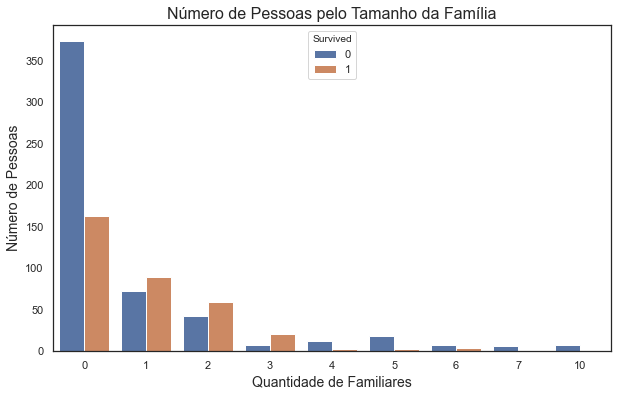

In [41]:
# Plotando o gráfico de countplot
fig, ax = plt.subplots(1,1, figsize=(10,6))
ax = sns.countplot(x=dfTrain.FamilySize, hue=dfTrain.Survived, data=dfTrain)
ax.set_title("Número de Pessoas pelo Tamanho da Família", fontdict={'size':16})
ax.xaxis.set_label_text("Quantidade de Familiares",fontdict={'size':14})
ax.yaxis.set_label_text("Número de Pessoas", fontdict={'size':14})
plt.show()

<p><font size="3.5">Podemos perceber que quem tem de 1 a 3 familiares teve uma chance maior de sobrevivência, já quem tem nenhum ou mais de 3 familiares não teve poucas chances e em alguns casos, nenhuma chance. Sinceramente, eu não esperava que a quantidade de familiares faria diferença em nosso modelo, mas aparentemente faz, por isso, vamos incluí-lo.</font><p>
<p><font size="3.5">Outra análise que pode ser interessante é quanto ao título de cada passageiro, pois acredito que quem tinha um título de importancia, como Coronel, ou Doutor, teve mais chance do que quem não tinha um título muito importante.</font><p>

## Análise por Título

<p><font size="3.5">Vamos gerar o gráfico do Título da pessoa em relação ao número de sobreviventes e mortos.</font><p>

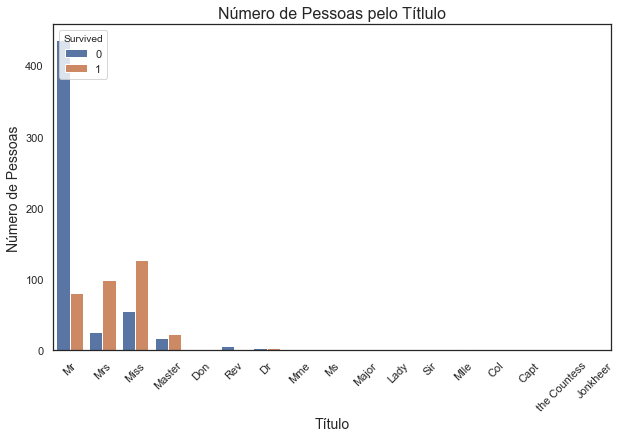

In [42]:
# Plotando o gráfico de countplot
fig, ax = plt.subplots(1,1, figsize=(10, 6))
ax = sns.countplot(x=dfTrain.Title, hue=dfTrain.Survived, data=dfTrain)
ax.set_title("Número de Pessoas pelo Títlulo", fontdict={'size':16})
ax.xaxis.set_label_text("Título",fontdict={'size':14})
ax.yaxis.set_label_text("Número de Pessoas", fontdict={'size':14})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

<p><font size="3.5">Este gráfico está com uma visualização péssima devido ao número de "Mr" ser muito grande com relação aos outros passageiros, vamos dividí-lo em duas partes para facilitar a visualização.</font><p>

In [43]:
title1 = dfTrain.query('Title == ["Mr", "Mrs", "Miss", "Master"]')
title2 = dfTrain.query('Title == ["Don", "Rev", "Dr", "Mme", "Ms", "Major", "Lady", "Sir", ''\
                       "Mlle", "Col", "Capt", "the Countess", "Jonkheer"]')

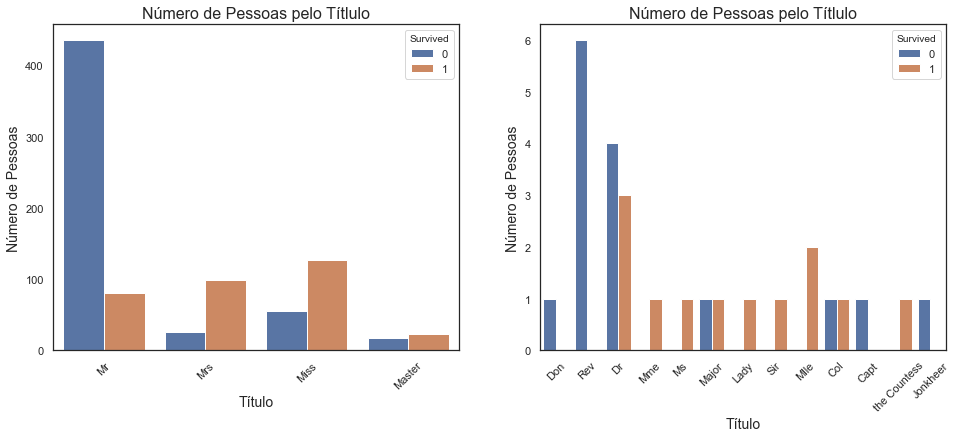

In [44]:
# Plotando os gráfico um do lado do outro.

fig, ax = plt.subplots(1,2, figsize=(16, 6))

#Gráfico 1
sns.countplot(x=title1.Title, hue=title1.Survived, ax=ax[0])
ax[0].set_title("Número de Pessoas pelo Títlulo", fontdict={'size':16})
ax[0].xaxis.set_label_text("Título",fontdict={'size':14})
ax[0].yaxis.set_label_text("Número de Pessoas", fontdict={'size':14})
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)

#Gráfico 2
sns.countplot(x=title2.Title, hue=title2.Survived, ax=ax[1])
ax[1].set_title("Número de Pessoas pelo Títlulo", fontdict={'size':16})
ax[1].xaxis.set_label_text("Título",fontdict={'size':14})
ax[1].yaxis.set_label_text("Número de Pessoas", fontdict={'size':14})
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)

plt.show()

<p><font size="3.5">Realmente, o título parece fazer muita diferença, pois nele conseguimos separar em sua maioria as mulheres dos homens, crianças de adultos e ainda percebemos alguns títulos importantes, como "Col" e "Dr". Portanto a coluna Title também será acrescentada em nosso modelo preditivo.</font><p>
<p><font size="3.5">Antes de gerar os algorítmos, vou juntar algumas categorias, pois existem poucos passageiros nelas e também para que não fique muito pesado para rodar o algoritmo. Se olharmos no segundo gráfico percebemos que os passageiros de título 'Don', 'Rev', 'Capt' e 'Jonkeer', todos morreram, então vou renomeá-los de "othersDead", já os passageiros de título 'Mme', 'Ms' e 'Lady', todos sobreviveram, então vou renomeá-los de "othesAlive" e os passageiros de título 'Col' e 'Major' tiveram 50% de chance de sobreviver, então vou renomeá-los de "others50perc"</font><p>

In [45]:
#Criando um dicionário para renomear os passageiros:
othersDead = {'Don':'othersDead', 'Rev':'othersDead', 'Capt':'othersDead', 'Jonkheer':'othersDead'}
othersAlive = {'Mme':'othersAlive', 'Ms':'othersAlive', 'Lady':'othersAlive',
               'Sir':'othersAlive', 'Mlle': 'othersAlive', 'the Countess':'othersAlive'}
others50perc = {'Major': 'others50perc', 'Col': 'others50perc'}

In [46]:
#Renomeando os passageiros
dfTrain["Title"].replace(othersDead, inplace=True)
dfTrain["Title"].replace(othersAlive, inplace=True)
dfTrain["Title"].replace(others50perc, inplace=True)
#Verificando se a renomeação deu certo
dfTrain.Title.value_counts(dropna=False)

Mr              517
Miss            182
Mrs             125
Master           40
othersDead        9
Dr                7
othersAlive       7
others50perc      4
Name: Title, dtype: int64

# Algorítmos para o 2º Modelo Preditivo

In [47]:
#Criação de X_teste1 y_teste1
X_train2 = dfTrain.loc[:, ["Pclass", "Sex", "Title", "AgeRange", "FareRange", "FamilySize"]]
y_train2 = dfTrain["Survived"]

In [48]:
#Fazendo a transformação das colunas do dataframe
transCol = make_column_transformer((OneHotEncoder(), ["Pclass", "Sex", "Title", "AgeRange", "FareRange", "FamilySize"]),
                                   remainder='passthrough')

## Regressão Logística

In [49]:
#chamando a função LogisticRegression
logreg = LogisticRegression(solver='lbfgs')

#Usando o Pipeline para unir as duas funções acima.
pipe = Pipeline([
    ('trans', transCol),
    ('clf', logreg)
])

#Definindo os possíveis parâmetros para o função.
param_grid = {'clf__penalty': ['l1','l2'], 'clf__C': [0.001,0.01,0.1,1,10,100,1000]}

#Encontrando o melhor parâmetro para a função.
logreg_grid = GridSearchCV(pipe, param_grid, cv=10, refit=True, verbose=1, n_jobs=-1)

#Treinando o algorítmo com os parâmetros escolhidos.
logreg_grid.fit(X_train2, y_train2)

#Verificando a acuracia do modelo.
logreg_grid.best_score_

Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    3.8s finished


0.8193133583021224

## K Nearest Neighbor (KNN)

In [50]:
## K Nearest Neighbor (KNN)
#chamando a função K Nearest Neighbor
knn = KNeighborsClassifier()

#Usando o Pipeline para unir as duas funções acima.
pipe = Pipeline([
    ('trans', transCol),
    ('clf', knn)
])

#Definindo os possíveis parâmetros para o função.
param_grid = {'clf__n_neighbors': list(range(1,31)), 'clf__weights':['uniform', 'distance']}

#Encontrando o melhor parâmetro para a função.
knn_grid = GridSearchCV(pipe, param_grid, cv=10, refit=True, verbose=1, n_jobs=-1)

#Treinando o algorítmo com os parâmetros escolhidos.
knn_grid.fit(X_train2, y_train2)

#Verificando a acuracia do modelo.
knn_grid.best_score_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    6.2s finished


0.8249563046192259

## Support Vector Machines (SVC)

In [51]:
#chamando a função SVC
svc = SVC()

#Usando o Pipeline para unir as duas funções acima.
pipe = Pipeline([
    ('trans', transCol),
    ('clf', svc)
])

#Definindo os possíveis parâmetros para o função.
param_grid = {'clf__C': [0.1,10, 100, 1000,5000], 'clf__gamma': [1,0.1,0.01,0.001,0.0001], 'clf__kernel': ['rbf']}

#Encontrando o melhor parâmetro para a função.
svc_grid = GridSearchCV(pipe, param_grid, cv=10, refit=True, verbose=1)

#Treinando o algorítmo com os parâmetros escolhidos.
svc_grid.fit(X_train2, y_train2)

#Verificando a acuracia do modelo.
svc_grid.best_score_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   16.5s finished


0.8316479400749064

## Random Forest Classifier (RFC)

In [52]:
#chamando a função RFC
rfc = RandomForestClassifier()

#Usando o Pipeline para unir as duas funções acima.
pipe = Pipeline([
    ('trans', transCol),
    ('clf', rfc)
])

#Definindo os possíveis parâmetros para o função.
param_grid = { 
    'clf__n_estimators': [200, 500],
    'clf__max_features': ['auto', 'sqrt', 'log2'],
    'clf__max_depth' : [4,5,6,7,8],
    'clf__criterion' :['gini', 'entropy']
}

#Encontrando o melhor parâmetro para a função.
rfc_grid = GridSearchCV(pipe, param_grid, cv=10, refit=True, verbose=1)

#Treinando o algorítmo com os parâmetros escolhidos.
rfc_grid.fit(X_train2,y_train2)

#Verificando a acuracia do modelo.
rfc_grid.best_score_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:  8.6min finished


0.8327715355805243

## Árvore de Decisão (Decision Tree Classifier)

In [53]:
#chamando a função Decision Tree Classifier
tree = DecisionTreeClassifier()

#Usando o Pipeline para unir as duas funções acima.
pipe = Pipeline([
    ('trans', transCol),
    ('clf', tree)
])

#Definindo os possíveis parâmetros para o função.
param_grid = {'clf__criterion':['gini','entropy'],'clf__max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}

#Encontrando o melhor parâmetro para a função.
tree_grid = GridSearchCV(pipe, param_grid, cv=20, refit=True, verbose=1)

#Treinando o algorítmo com os parâmetros escolhidos.
tree_grid.fit(X_train2, y_train2)

#Verificando a acurácia do modelo.
tree_grid.best_score_

Fitting 20 folds for each of 36 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:   14.3s finished


0.8337878787878787

<p><font size="3.5">Desta vez o algoritmo árvore de decisão (decision tree classifier) foi o que teve melhor resulta. Comparando aos algoritmos anteriores, todos foram bem sucedido. Sinal de que a inclussão das novas variáveis fizerem um efeito positivo.</font><p>

# 2ª predição para o problema do Titanic.

<p><font size="3.5">Para fazer a previsão no dataframe de teste, precisamos criar a coluna "FamilySize" e trocar os títulos, conforme foi feito no dataframe de treino.</font><p>

In [54]:
dfTest["FamilySize"] = dfTest["SibSp"] + dfTest["Parch"]
dfTest.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeRange,FareRange,FamilySize
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,30 a 40,Menos de 17,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,40 a 50,Menos de 17,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,Mais de 60,Menos de 17,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr,20 a 30,Menos de 17,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs,20 a 30,Menos de 17,2


In [55]:
#Renomeando os passageiros
dfTest["Title"].replace(othersDead, inplace=True)
dfTest["Title"].replace(othersAlive, inplace=True)
dfTest["Title"].replace(others50perc, inplace=True)
#Verificando se a renomeação deu certo
dfTest.Title.value_counts(dropna=False)

Mr              240
Miss             78
Mrs              72
Master           21
others50perc      2
othersDead        2
Dona              1
othersAlive       1
Dr                1
Name: Title, dtype: int64

<p><font size="3.5">Notamos que neste dataframe existe um novo título, que é "Dona", como ele não existe no algorítimo de teste, precisamos incluí-lo em algum daqueles títulos criados. Como "Dona" representa uma mulher, vou adicioná-la como otherAlive, pois acredito que a probabilidade dela sobreviver seja alta.</font><p>

In [56]:
dfTest["Title"].replace({'Dona': 'othersAlive'}, inplace=True)
dfTest.Title.value_counts(dropna=False)

Mr              240
Miss             78
Mrs              72
Master           21
othersAlive       2
others50perc      2
othersDead        2
Dr                1
Name: Title, dtype: int64

<p><font size="3.5">Agora podemos fazer a predição</font><p>

In [57]:
#Criando o X teste.
X_test2 = dfTest.loc[:, ["Pclass", "Sex", "Title", "AgeRange", "FareRange", "FamilySize"]]
X_test2.head()

,Pclass,Sex,Title,AgeRange,FareRange,FamilySize
0,3,male,Mr,30 a 40,Menos de 17,0
1,3,female,Mrs,40 a 50,Menos de 17,1
2,2,male,Mr,Mais de 60,Menos de 17,0
3,3,male,Mr,20 a 30,Menos de 17,0
4,3,female,Mrs,20 a 30,Menos de 17,2


In [58]:
#Gerando a resposta
y_test2 = tree_grid.predict(X_test2)
print(y_test2)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [59]:
#Criando a série com a resposta.
predict2 = pd.Series(y_test1, index=dfTest["PassengerId"])
predict2.to_csv(r'dataSets/predict2.csv', header=True)

In [60]:
#Mostrando os 5 primeiros elementos da série.
!head -n5 dataSets/predict2.csv

PassengerId,0
892,0
893,0
894,0
895,0


<p><font size="3.5">Com esse novo modelo consegui obter 79,9% de acerto no kaggle. Uma boa margem de acerto, mas o meu obejtivo é bater os 80%, acredito que se eu adicionar a coluna Embarked, talvez eu consiga obter esse objetivo.</font><p>

# Terceira exploração dos dados

## Analisando a coluna Embarked

<p><font size="3.5">Como vimos la no começo, existem 2 valores nulos na coluna embarked. Vamos tratálos para que não tenhamo problemas durante a execução do algorítmo.</font><p>

In [61]:
#Buscando as linha com Embarked NA.
dfTrain.loc[dfTrain['Embarked'].isna()==True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeRange,FareRange,FamilySize
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Miss,30 a 40,45 a 85,0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Mrs,Mais de 60,45 a 85,0


<p><font size="3.5">Vamos gerar o gráfico para ter uma ideia do que fazer com essas duas colunas, se ele vai ajudar na nossa predição ou não.</font><p>

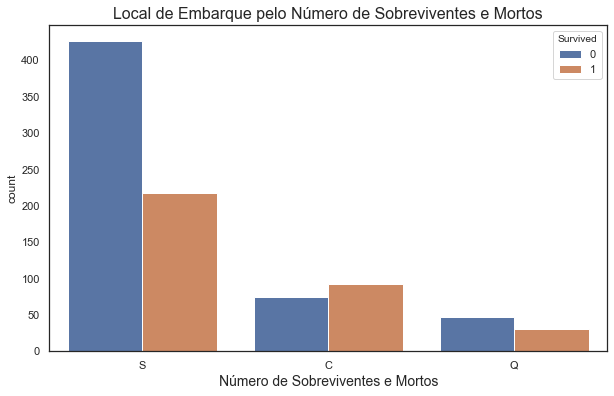

In [62]:
#Gerando o gráfico de Local de embarque pelo número de mortos e vivos.
plt.figure(figsize=(10,6))
ax = sns.countplot(x=dfTrain.Embarked, hue=dfTrain.Survived, data=dfTrain)
ax.set_title("Local de Embarque pelo Número de Sobreviventes e Mortos", fontsize=16)
ax.xaxis.set_label_text("Local de Embarque", fontsize=14)
ax.xaxis.set_label_text("Número de Sobreviventes e Mortos", fontsize=14)
plt.show()

<p><font size="3.5">Podemos notar que quem embarcou em Southampton (S) teve aproximadamente 30% de chance de sobrevivencia, enquanto quem embarcou em Cherbourg (C) teve mais chance de sobreviver do que de morrer e quem embarcou em Queenstown (Q) teve mais chance de morrer do que de sobreviver.</font><p>
<p><font size="3.5">Observando as características das duas passageiras acima, vemos que elas mulheres e que pagaram uma taxa de quase 85 libras, o que lhes da uma grande chance de sobrevivência. Devido a isso, decidi incluí-las no grupo que embarcou em Cherbourg (C).<p></font><p>

In [63]:
dfTrain.loc[dfTrain['Embarked'].isna()==True, 'Embarked'] = 'C'
dfTrain.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
AgeRange         0
FareRange        0
FamilySize       0
dtype: int64

<p><font size="3.5">Agora vamos treinar novamente esse dataframe com a nova coluna e ver se obteremos resultados melhores.</font><p>

# Algorítmos para o 3º Modelo Preditivo

In [64]:
#Criação de X_teste1 y_teste1
X_train3 = dfTrain.loc[:, ["Sex", "Title", "AgeRange", "FareRange", "Pclass", "Embarked",  "FamilySize"]]
y_train3 = dfTrain["Survived"]

In [65]:
#Fazendo a transformação das colunas do dataframe
transCol = make_column_transformer((OneHotEncoder(), ["Sex", "Title", "AgeRange", "FareRange", "Pclass", "Embarked",  "FamilySize"]),
                                   remainder='passthrough')

## Regressão Logística

In [66]:
#chamando a função LogisticRegression
logreg = LogisticRegression(solver='lbfgs')

#Usando o Pipeline para unir as duas funções acima.
pipe = Pipeline([
    ('trans', transCol),
    ('clf', logreg)
])

#Definindo os possíveis parâmetros para o função.
param_grid = {'clf__penalty': ['l1','l2'], 'clf__C': [0.001,0.01,0.1,1,10,100,1000]}

#Encontrando o melhor parâmetro para a função.
logreg_grid = GridSearchCV(pipe, param_grid, cv=10, refit=True, verbose=1, n_jobs=-1)

#Treinando o algorítmo com os parâmetros escolhidos.
logreg_grid.fit(X_train3, y_train3)

#Verificando a acuracia do modelo.
logreg_grid.best_score_

Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    4.8s finished
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8271785268414483

## K Nearest Neighbor (KNN)

In [67]:
#chamando a função K Nearest Neighbor
knn = KNeighborsClassifier()

#Usando o Pipeline para unir as duas funções acima.
pipe = Pipeline([
    ('trans', transCol),
    ('clf', knn)
])

#Definindo os possíveis parâmetros para o função.
param_grid = {'clf__n_neighbors': list(range(1,31)), 'clf__weights':['uniform', 'distance']}

#Encontrando o melhor parâmetro para a função.
knn_grid = GridSearchCV(pipe, param_grid, cv=10, refit=True, verbose=1, n_jobs=-1)

#Treinando o algorítmo com os parâmetros escolhidos.
knn_grid.fit(X_train3, y_train3)

#Verificando a acuracia do modelo.
knn_grid.best_score_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    7.7s finished


0.8282896379525593

## Support Vector Machines (SVC)

In [68]:
#chamando a função SVC
svc = SVC()

#Usando o Pipeline para unir as duas funções acima.
pipe = Pipeline([
    ('trans', transCol),
    ('clf', svc)
])

#Definindo os possíveis parâmetros para o função.
param_grid = {'clf__C': [0.1,10, 100, 1000,5000], 'clf__gamma': [1,0.1,0.01,0.001,0.0001], 'clf__kernel': ['rbf']}

#Encontrando o melhor parâmetro para a função.
svc_grid = GridSearchCV(pipe, param_grid, cv=10, refit=True, verbose=1)

#Treinando o algorítmo com os parâmetros escolhidos.
svc_grid.fit(X_train3, y_train3)

#Verificando a acuracia do modelo.
svc_grid.best_score_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   20.7s finished


0.8327840199750313

## Random Forest Classifier (RFC)

In [69]:
#chamando a função RFC
rfc = RandomForestClassifier()

#Usando o Pipeline para unir as duas funções acima.
pipe = Pipeline([
    ('trans', transCol),
    ('clf', rfc)
])

#Definindo os possíveis parâmetros para o função.
param_grid = { 
    'clf__n_estimators': [200, 500],
    'clf__max_features': ['auto', 'sqrt', 'log2'],
    'clf__max_depth' : [4,5,6,7,8],
    'clf__criterion' :['gini', 'entropy']
}

#Encontrando o melhor parâmetro para a função.
rfc_grid = GridSearchCV(pipe, param_grid, cv=10, refit=True, verbose=1)

#Treinando o algorítmo com os parâmetros escolhidos.
rfc_grid.fit(X_train3,y_train3)

#Verificando a acuracia do modelo.
rfc_grid.best_score_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:  8.7min finished


0.8350062421972535

## Árvore de Decisão (Decision Tree Classifier)

In [70]:
## Árvore de Decisão (Decision Tree Classifier)
#chamando a função Decision Tree Classifier
tree = DecisionTreeClassifier()

#Usando o Pipeline para unir as duas funções acima.
pipe = Pipeline([
    ('trans', transCol),
    ('clf', tree)
])

#Definindo os possíveis parâmetros para o função.
param_grid = {'clf__criterion':['gini','entropy'],'clf__max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}

#Encontrando o melhor parâmetro para a função.
tree_grid = GridSearchCV(pipe, param_grid, cv=20, refit=True, verbose=1)

#Treinando o algorítmo com os parâmetros escolhidos.
tree_grid.fit(X_train3, y_train3)

#Verificando a acurácia do modelo.
tree_grid.best_score_

Fitting 20 folds for each of 36 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:   13.2s finished


0.8304545454545454

<p><font size="3.5">Nesta terceira tentativa não obtivemos nenhum resultado relevante, sinal de que a coluna Embarked não faz tanta diferença em nossa predição. Mas enquanto eu estava analizando as duas colunas de Embarked igual a NaN percebi que existem alguns tickets que são iguais. Vamos tentar tirar algum insight dessa coluna.</font><p>

In [71]:
dfTrain.Ticket.value_counts().head(50)

1601             7
347082           7
CA. 2343         7
CA 2144          6
347088           6
3101295          6
382652           5
S.O.C. 14879     5
349909           4
17421            4
W./C. 6608       4
LINE             4
2666             4
347077           4
19950            4
4133             4
113781           4
113760           4
PC 17757         4
C.A. 31921       3
24160            3
29106            3
PC 17572         3
345773           3
347742           3
248727           3
PC 17760         3
363291           3
13502            3
PC 17582         3
C.A. 34651       3
239853           3
110413           3
PC 17755         3
230080           3
371110           3
35273            3
F.C.C. 13529     3
SC/Paris 2123    3
110152           3
113806           2
2651             2
36928            2
11751            2
250655           2
243847           2
WE/P 5735        2
2627             2
364849           2
2691             2
Name: Ticket, dtype: int64

<p><font size="3.5">Não são muitos, mas vamos analizar alguns desses dados com mais repetições.</font><p>
<p><font size="3.5">Vamos analizar esses dados em uma cópia do dataframe original, para que mantenha sua integridade.</font><p>

In [72]:
dfTrain1 = dfTrain.copy()

In [73]:
dfTrain1.loc[dfTrain1.Ticket == 'CA. 2343']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeRange,FareRange,FamilySize
159,160,0,3,"Sage, Master. Thomas Henry",male,5.0,8,2,CA. 2343,69.55,NaN,S,Master,Menos de 10,45 a 85,10
180,181,0,3,"Sage, Miss. Constance Gladys",female,22.0,8,2,CA. 2343,69.55,NaN,S,Miss,20 a 30,45 a 85,10
201,202,0,3,"Sage, Mr. Frederick",male,32.0,8,2,CA. 2343,69.55,NaN,S,Mr,30 a 40,45 a 85,10
324,325,0,3,"Sage, Mr. George John Jr",male,32.0,8,2,CA. 2343,69.55,NaN,S,Mr,30 a 40,45 a 85,10
792,793,0,3,"Sage, Miss. Stella Anna",female,22.0,8,2,CA. 2343,69.55,NaN,S,Miss,20 a 30,45 a 85,10
846,847,0,3,"Sage, Mr. Douglas Bullen",male,32.0,8,2,CA. 2343,69.55,NaN,S,Mr,30 a 40,45 a 85,10
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,22.0,8,2,CA. 2343,69.55,NaN,S,Miss,20 a 30,45 a 85,10


In [74]:
dfTrain1.loc[dfTrain1.Ticket == '1601']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeRange,FareRange,FamilySize
74,75,1,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S,Mr,30 a 40,45 a 85,0
169,170,0,3,"Ling, Mr. Lee",male,28.0,0,0,1601,56.4958,NaN,S,Mr,20 a 30,45 a 85,0
509,510,1,3,"Lang, Mr. Fang",male,26.0,0,0,1601,56.4958,NaN,S,Mr,20 a 30,45 a 85,0
643,644,1,3,"Foo, Mr. Choong",male,32.0,0,0,1601,56.4958,NaN,S,Mr,30 a 40,45 a 85,0
692,693,1,3,"Lam, Mr. Ali",male,32.0,0,0,1601,56.4958,NaN,S,Mr,30 a 40,45 a 85,0
826,827,0,3,"Lam, Mr. Len",male,32.0,0,0,1601,56.4958,NaN,S,Mr,30 a 40,45 a 85,0
838,839,1,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,NaN,S,Mr,30 a 40,45 a 85,0


In [75]:
dfTrain1.loc[dfTrain1.Ticket == '347082']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeRange,FareRange,FamilySize
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.275,NaN,S,Mr,30 a 40,17 a 45,6
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.275,NaN,S,Miss,Menos de 10,17 a 45,6
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.275,NaN,S,Miss,Menos de 10,17 a 45,6
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.275,NaN,S,Miss,10 a 20,17 a 45,6
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.275,NaN,S,Mrs,30 a 40,17 a 45,6
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.275,NaN,S,Miss,Menos de 10,17 a 45,6
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.275,NaN,S,Master,Menos de 10,17 a 45,6


<p><font size="3.5">Se olharmos para esses 3 datasets podemos ver que em dois deles, os tickets pertencem a mesma família e no segundo a um grupo de chineses. Nos datasets com os passageiros da mesma famíli todos morreram, mas isso ja tinhamos visto no gráfico de FamilySize.</font><p>
<p><font size="3.5">Uma falha que eu cometi durante as análises, por falta de intepretação foi que a taxa "Fare" de um ticket é apenas uma. Então o certo seria dividir essa taxa pelo número de tickets iguais. Vamos fazer essa alterção e ver o se conseguimos uma divisão melhor e mais clara pela taxa (Fare)</font><p>

In [76]:
#Criando um dicionário de ticket e quantidade
numeroDeTickets = dict(dfTrain1.Ticket.value_counts())

<p><font size="3.5">Vamos criar a coluna "NumTickets", que nos dará a quantidade de tickets iguais que ele possui.</font><p>

In [77]:
dfTrain1["NumTickets"] = dfTrain1["Ticket"].map(numeroDeTickets)
dfTrain1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeRange,FareRange,FamilySize,NumTickets
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,20 a 30,Menos de 17,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,30 a 40,45 a 85,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,20 a 30,Menos de 17,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,30 a 40,45 a 85,1,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,30 a 40,Menos de 17,0,1


<p><font size="3.5">Vamos criar também a coluna "RealFare", que terá a taxa "Real" paga pelo passageiro.</font><p>

In [78]:
dfTrain1["RealFare"] = dfTrain1["Fare"] / dfTrain1["NumTickets"]
dfTrain1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeRange,FareRange,FamilySize,NumTickets,RealFare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,20 a 30,Menos de 17,1,1,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,30 a 40,45 a 85,1,1,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,20 a 30,Menos de 17,0,1,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,30 a 40,45 a 85,1,2,26.5500
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,30 a 40,Menos de 17,0,1,8.0500


In [79]:
dfTrain1.RealFare

0       7.2500
1      71.2833
2       7.9250
3      26.5500
4       8.0500
        ...   
886    13.0000
887    30.0000
888    11.7250
889    30.0000
890     7.7500
Name: RealFare, Length: 891, dtype: float64

<p><font size="3.5">Vamos fazer novamente a análise de mortos e sobrevivente pelo número "real" pago ticket e com a idade de cada passageiro.</font><p>

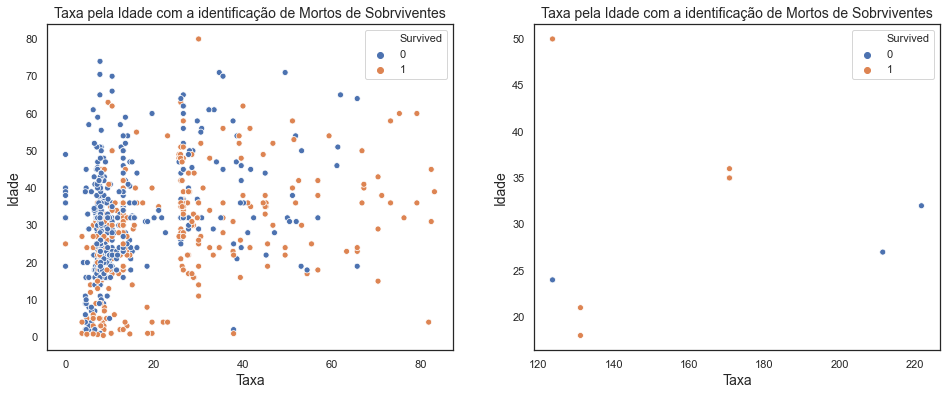

In [80]:
#Criando os datasets
maisDe85 = dfTrain1.query('RealFare > 85')
menosDe85 = dfTrain1.query('RealFare <=85')

fig, ax = plt.subplots(1,2,figsize=(16,6))
sns.scatterplot(x=menosDe85.RealFare, y=menosDe85.Age, hue=menosDe85.Survived, data=menosDe85, ax=ax[0])
ax[0].set_title('Taxa pela Idade com a identificação de Mortos de Sobrviventes', fontsize=14)
ax[0].xaxis.set_label_text("Taxa", fontsize=14)
ax[0].yaxis.set_label_text("Idade", fontsize=14)
sns.scatterplot(x=maisDe85.RealFare, y=maisDe85.Age, hue=maisDe85.Survived, data=maisDe85, ax=ax[1])
ax[1].set_title('Taxa pela Idade com a identificação de Mortos de Sobrviventes', fontsize=14)
ax[1].xaxis.set_label_text("Taxa", fontsize=14)
ax[1].yaxis.set_label_text("Idade", fontsize=14)
plt.show()

<p><font size="3.5">Vamos divir este gráfico em três partes:</font><p>

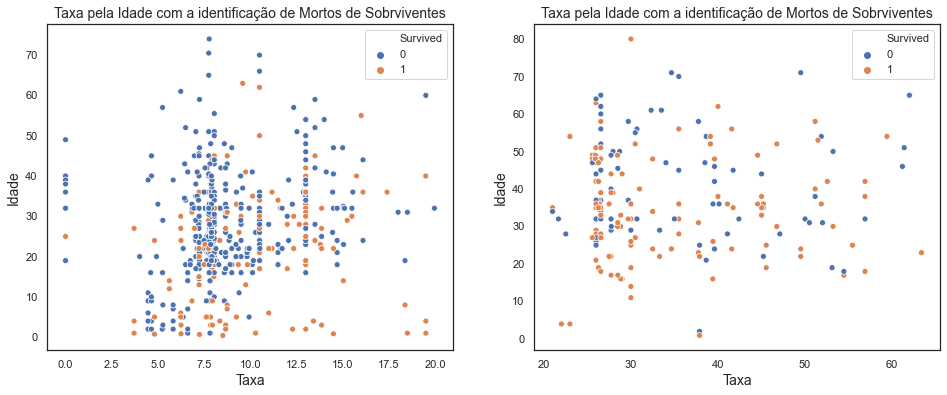

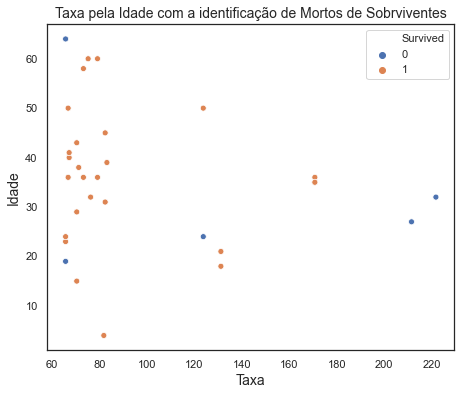

In [81]:
#Criando os datasets
maisDe85 = dfTrain1.query('RealFare > 65')
entre65e25 = dfTrain1.query(f'RealFare <=65 & RealFare >20')
menosDe85 = dfTrain1.query('RealFare <=20')

fig, ax = plt.subplots(1,2,figsize=(16,6))
sns.scatterplot(x=menosDe85.RealFare, y=menosDe85.Age, hue=menosDe85.Survived, data=menosDe85, ax=ax[0])
ax[0].set_title('Taxa pela Idade com a identificação de Mortos de Sobrviventes', fontsize=14)
ax[0].xaxis.set_label_text("Taxa", fontsize=14)
ax[0].yaxis.set_label_text("Idade", fontsize=14)
sns.scatterplot(x=entre65e25.RealFare, y=entre65e25.Age, hue=entre65e25.Survived, data=entre65e25, ax=ax[1])
ax[1].set_title('Taxa pela Idade com a identificação de Mortos de Sobrviventes', fontsize=14)
ax[1].xaxis.set_label_text("Taxa", fontsize=14)
ax[1].yaxis.set_label_text("Idade", fontsize=14)
plt.show()
fig, ax = plt.subplots(1,1,figsize=(7.3,6))
sns.scatterplot(x=maisDe85.RealFare, y=maisDe85.Age, hue=maisDe85.Survived, data=maisDe85)
ax.set_title('Taxa pela Idade com a identificação de Mortos de Sobrviventes', fontsize=14)
ax.xaxis.set_label_text("Taxa", fontsize=14)
ax.yaxis.set_label_text("Idade", fontsize=14)
plt.show()

<p><font size="3.5">Acho que essa divisão ficou mais justa, vamos mudar os valores novamente na coluna FareRange e ver se nosso algoritmo nos da uma resposta melhor.</font><p>

In [82]:
#Exlcuindo a coluna FareRange
#dfTrain1.drop(columns = ['FareRange'], inplace=True)

In [83]:
#Criando novamente a coluna FareRange
bins = [-1, 19.999, 64.999, 999]
valorTicket = ['Menos de 20','20 a 65', 'Mais de 65']
dfTrain1['FareRange'] = pd.cut(dfTrain1['RealFare'], bins, labels=valorTicket)
dfTrain1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeRange,FareRange,FamilySize,NumTickets,RealFare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,20 a 30,Menos de 20,1,1,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,30 a 40,Mais de 65,1,1,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,20 a 30,Menos de 20,0,1,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,30 a 40,20 a 65,1,2,26.5500
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,30 a 40,Menos de 20,0,1,8.0500


# Algorítmos para o 3º Modelo Preditivo (segunda vez)

In [84]:
from sklearn.preprocessing import StandardScaler

In [85]:
#Criação de X_teste1 y_teste1
X_train3 = dfTrain1.loc[:, ["Sex", "Title", "AgeRange", "FareRange", "Pclass", "Embarked", "FamilySize"]]
y_train3 = dfTrain1["Survived"]

In [86]:
#Fazendo a transformação das colunas do dataframe
transCol = make_column_transformer((OneHotEncoder(), ["Sex", "Title", "AgeRange", "FareRange", "Pclass", "Embarked", "FamilySize"]),
                                   remainder='passthrough')

## Regressão Logística

In [87]:
#chamando a função LogisticRegression
logreg = LogisticRegression(solver='lbfgs')

#Usando o Pipeline para unir as duas funções acima.
pipe = Pipeline([
    ('trans', transCol),
    ('clf', logreg)
])

#Definindo os possíveis parâmetros para o função.
param_grid = {'clf__penalty': ['l1','l2'], 'clf__C': [0.001,0.01,0.1,1,10,100,1000]}

#Encontrando o melhor parâmetro para a função.
logreg_grid = GridSearchCV(pipe, param_grid, cv=10, refit=True, verbose=1, n_jobs=-1)

#Treinando o algorítmo com os parâmetros escolhidos.
logreg_grid.fit(X_train3, y_train3)

#Verificando a acuracia do modelo.
logreg_grid.best_score_

Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    5.3s finished
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8316479400749064

## K Nearest Neighbor (KNN)

In [88]:
#chamando a função K Nearest Neighbor
knn = KNeighborsClassifier()

#Usando o Pipeline para unir as duas funções acima.
pipe = Pipeline([
    ('trans', transCol),
    ('clf', knn)
])

#Definindo os possíveis parâmetros para o função.
param_grid = {'clf__n_neighbors': list(range(1,31)), 'clf__weights':['uniform', 'distance']}

#Encontrando o melhor parâmetro para a função.
knn_grid = GridSearchCV(pipe, param_grid, cv=10, refit=True, verbose=1, n_jobs=-1)

#Treinando o algorítmo com os parâmetros escolhidos.
knn_grid.fit(X_train3, y_train3)

#Verificando a acuracia do modelo.
knn_grid.best_score_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Done  80 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    7.8s finished


0.8215730337078652

## Support Vector Machines (SVC)

In [89]:
#chamando a função SVC
svc = SVC()

#Usando o Pipeline para unir as duas funções acima.
pipe = Pipeline([
    ('trans', transCol),
    ('clf', svc)
])

#Definindo os possíveis parâmetros para o função.
param_grid = {'clf__C': [0.1,10, 100, 1000,5000], 'clf__gamma': [1,0.1,0.01,0.001,0.0001], 'clf__kernel': ['rbf']}

#Encontrando o melhor parâmetro para a função.
svc_grid = GridSearchCV(pipe, param_grid, cv=10, refit=True, verbose=1)

#Treinando o algorítmo com os parâmetros escolhidos.
svc_grid.fit(X_train3, y_train3)

#Verificando a acuracia do modelo.
svc_grid.best_score_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   20.3s finished


0.8327715355805243

## Árvore de Decisão (Decision Tree Classifier)

In [90]:
#chamando a função Decision Tree Classifier
tree = DecisionTreeClassifier()

#Usando o Pipeline para unir as duas funções acima.
pipe = Pipeline([
    ('trans', transCol),
    ('clf', tree)
])

#Definindo os possíveis parâmetros para o função.
param_grid = {'clf__criterion':['gini','entropy'],'clf__max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}

#Encontrando o melhor parâmetro para a função.
tree_grid = GridSearchCV(pipe, param_grid, cv=20, refit=True, verbose=1)

#Treinando o algorítmo com os parâmetros escolhidos.
tree_grid.fit(X_train3, y_train3)

#Verificando a acurácia do modelo.
tree_grid.best_score_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 20 folds for each of 36 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:   14.5s finished


0.8292929292929292

<p><font size="3.5">Olhando para os resultados até agora, eles animadores. Não consigo ter nenhuma ideia a mais para fazer com esse dtaset, por isso, vou considerar minha ultima resposta como a final até o momento.</font><p>